Exercise 3: Clustering

In [1]:
# Student 1: name: Nadav Nisanov, i.d.: 324829613, github: https://github.com/Nadav5218
# Student 2: name: Shahaf Azaria, i.d.: 211437850, github: https://github.com/shahafazaria1

1. Function to create synthetic data - please do not change

In [2]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

In [3]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

Best k found: 8


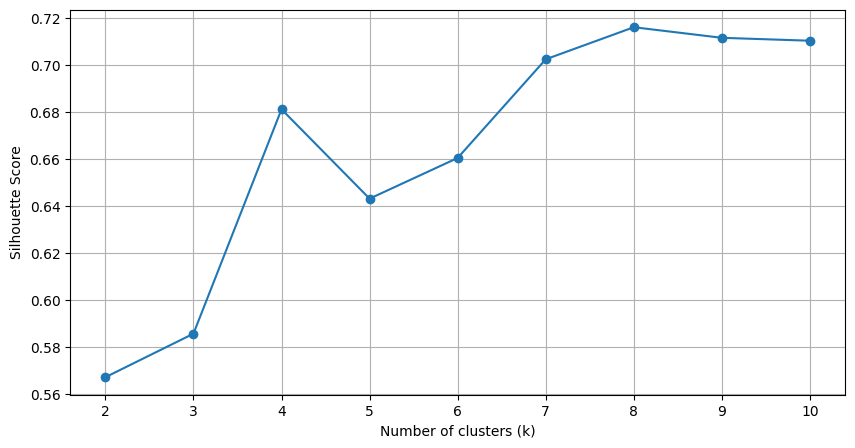

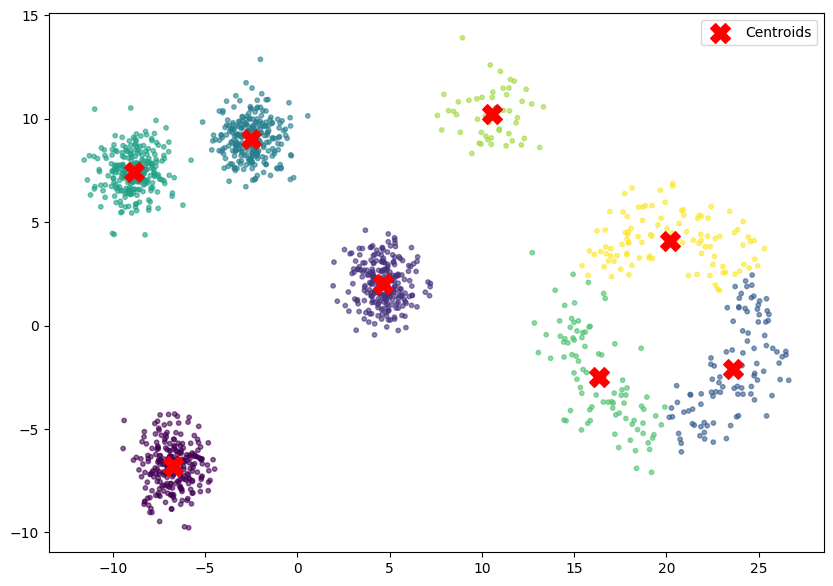

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11)

best_k = -1
best_score = -1
best_model = None

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_

    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

print(f"Best k found: {best_k}")

plt.figure(figsize=(10, 5))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

final_labels = best_model.labels_
centroids = best_model.cluster_centers_

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', s=10, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()



```
# This is formatted as code
```

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

Best k found: 6


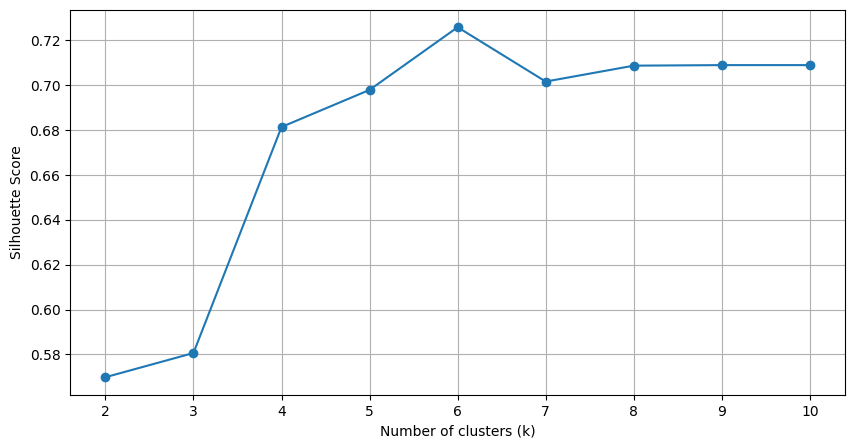

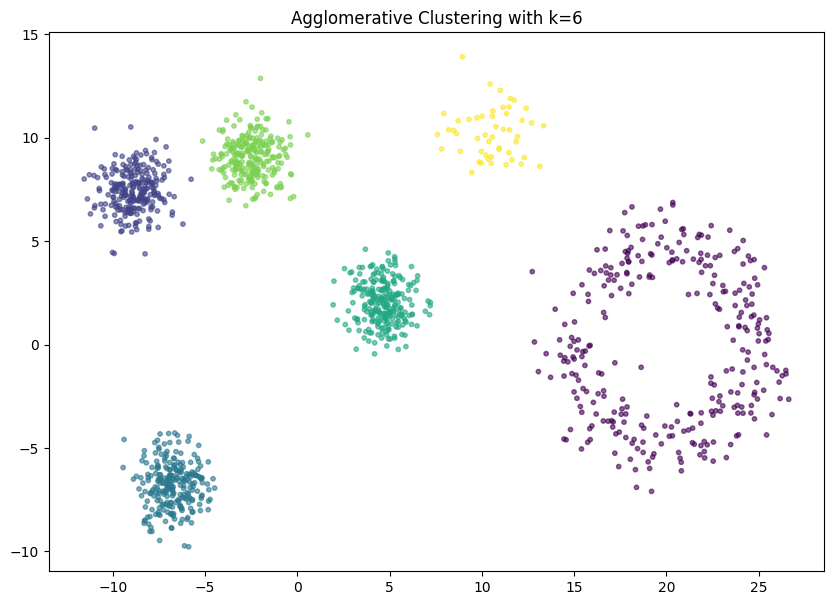

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11)

best_k = -1
best_score = -1
best_labels = None

for k in k_range:
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(X)

    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f"Best k found: {best_k}")

plt.figure(figsize=(10, 5))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(list(k_range))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=10, alpha=0.6)
plt.title(f'Agglomerative Clustering with k={best_k}')
plt.show()

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Best eps: 1.50, Best min_samples: 9


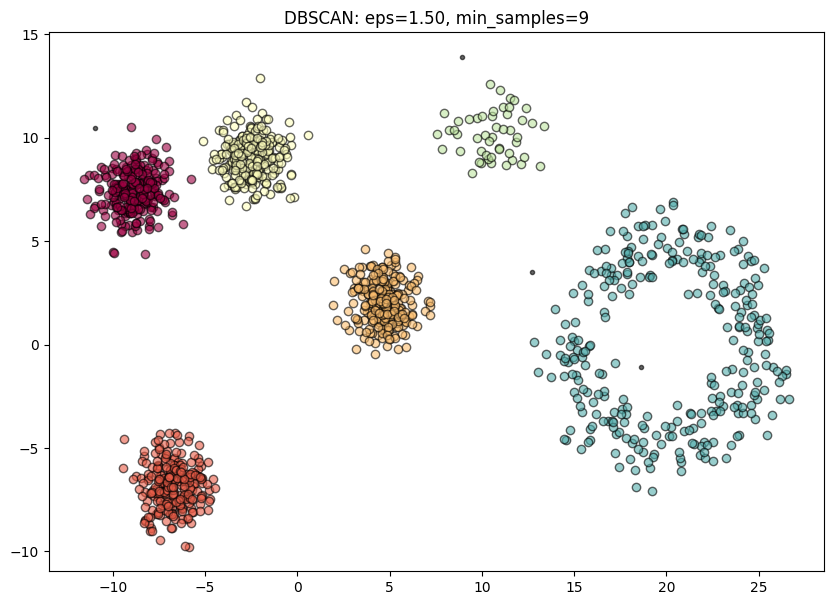

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

eps_range = np.arange(0.5, 5.0, 0.2)
min_samples_range = range(3, 15)

best_score = -1
best_params = None
best_labels = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        unique_labels = set(labels)
        if len(unique_labels) > 1:
            score = silhouette_score(X, labels)

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels

print(f"Best eps: {best_params[0]:.2f}, Best min_samples: {best_params[1]}")

plt.figure(figsize=(10, 7))
unique_labels = set(best_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (best_labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 3, alpha=0.6)

plt.title(f'DBSCAN: eps={best_params[0]:.2f}, min_samples={best_params[1]}')
plt.show()

6. Compare the results and choose the best method for the data


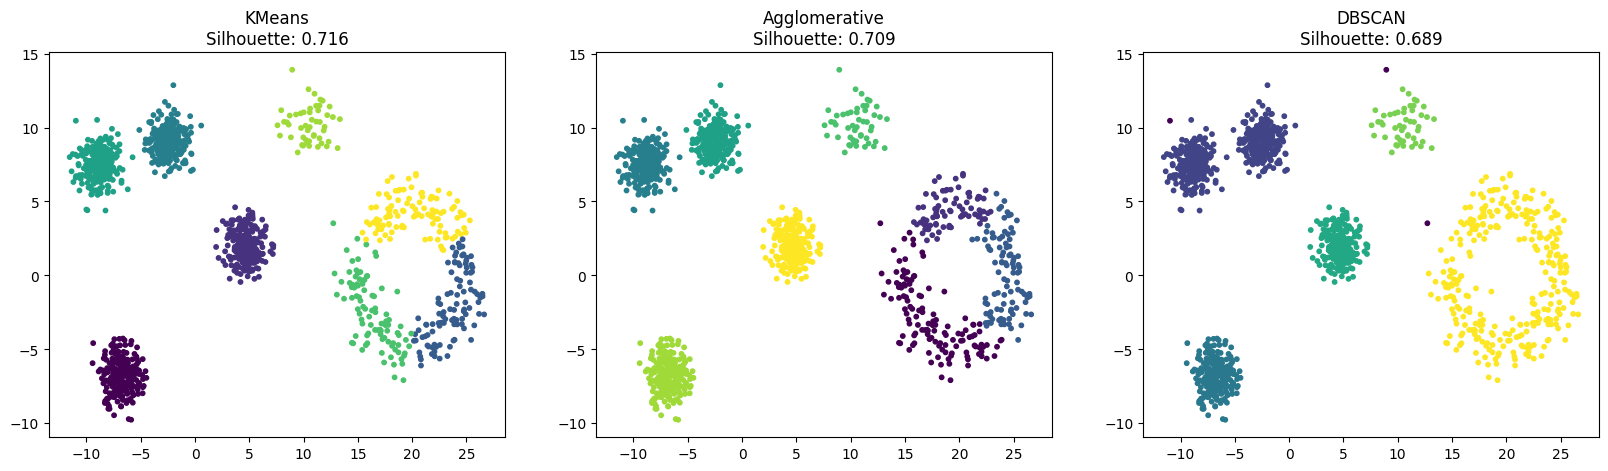

KMeans Score: 0.716
Agglomerative Score: 0.709
DBSCAN Score: 0.689
------------------------------
The best method is: KMeans


In [7]:


import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto').fit(X)
km_labels = kmeans.labels_
km_score = silhouette_score(X, km_labels)

agg = AgglomerativeClustering(n_clusters=8).fit(X)
agg_labels = agg.labels_
agg_score = silhouette_score(X, agg_labels)

dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X)
db_labels = dbscan.labels_

if len(set(db_labels)) > 1 and len(set(db_labels)) < len(X):
    db_score = silhouette_score(X, db_labels)
else:
    db_score = -1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(X[:, 0], X[:, 1], c=km_labels, cmap='viridis', s=10)
ax1.set_title(f'KMeans\nSilhouette: {km_score:.3f}')

ax2.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10)
ax2.set_title(f'Agglomerative\nSilhouette: {agg_score:.3f}')

ax3.scatter(X[:, 0], X[:, 1], c=db_labels, cmap='viridis', s=10)
ax3.set_title(f'DBSCAN\nSilhouette: {db_score:.3f}')

plt.show()

scores = {'KMeans': km_score, 'Agglomerative': agg_score, 'DBSCAN': db_score}
best_method = max(scores, key=scores.get)

print(f"KMeans Score: {km_score:.3f}")
print(f"Agglomerative Score: {agg_score:.3f}")
print(f"DBSCAN Score: {db_score:.3f}")
print("-" * 30)
print(f"The best method is: {best_method}")

In [8]:
!pip install mlflow

import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from google.colab import files

mlflow.set_experiment("Clustering_Assignment_3")

results = []

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    with mlflow.start_run(run_name=f"KMeans_k_{k}"):
        model = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = model.fit_predict(X)

        sil_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)

        mlflow.log_param("algorithm", "KMeans")
        mlflow.log_param("n_clusters", k)
        mlflow.log_metric("silhouette_score", sil_score)
        mlflow.log_metric("calinski_harabasz_score", ch_score)
        mlflow.sklearn.log_model(model, "model")

        results.append({
            "Algorithm": "KMeans",
            "Parameters": f"n_clusters={k}",
            "Silhouette Score": sil_score,
            "Calinski-Harabasz Score": ch_score
        })

for k in k_values:
    with mlflow.start_run(run_name=f"Agglomerative_k_{k}"):
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(X)

        sil_score = silhouette_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)

        mlflow.log_param("algorithm", "Agglomerative")
        mlflow.log_param("n_clusters", k)
        mlflow.log_metric("silhouette_score", sil_score)
        mlflow.log_metric("calinski_harabasz_score", ch_score)

        results.append({
            "Algorithm": "Agglomerative",
            "Parameters": f"n_clusters={k}",
            "Silhouette Score": sil_score,
            "Calinski-Harabasz Score": ch_score
        })

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
for eps in eps_values:
    with mlflow.start_run(run_name=f"DBSCAN_eps_{eps}"):
        model = DBSCAN(eps=eps, min_samples=5)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and len(set(labels)) < len(X):
            sil_score = silhouette_score(X, labels)
            ch_score = calinski_harabasz_score(X, labels)
        else:
            sil_score = -1
            ch_score = -1

        mlflow.log_param("algorithm", "DBSCAN")
        mlflow.log_param("eps", eps)
        mlflow.log_param("min_samples", 5)
        mlflow.log_metric("silhouette_score", sil_score)
        mlflow.log_metric("calinski_harabasz_score", ch_score)

        results.append({
            "Algorithm": "DBSCAN",
            "Parameters": f"eps={eps}, min_samples=5",
            "Silhouette Score": sil_score,
            "Calinski-Harabasz Score": ch_score
        })

df_results = pd.DataFrame(results)
df_results.to_excel("nadav&shahaf.xlsx", index=False)
files.download("nadav&shahaf.xlsx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.6/810.6 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00


2026/02/24 13:28:48 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/24 13:28:48 INFO mlflow.store.db.utils: Updating database tables
2026/02/24 13:28:50 INFO mlflow.tracking.fluent: Experiment with name 'Clustering_Assignment_3' does not exist. Creating a new experiment.
2026/02/24 13:28:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/24 13:28:51 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html
2026/02/24 13:28:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/24 13:28:58 WARNING mlflow.sklearn: Saving scikit-learn models in the pick

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>